In [1]:
import os, shutil

base_dir = 'liner_deep'


train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')


train_0_dir = os.path.join(train_dir, '0')
train_1_dir = os.path.join(train_dir, '1')
train_2_dir = os.path.join(train_dir, '2')
train_3_dir = os.path.join(train_dir, '3')
train_4_dir = os.path.join(train_dir, '4')
train_5_dir = os.path.join(train_dir, '5')
train_6_dir = os.path.join(train_dir, '6')
train_7_dir = os.path.join(train_dir, '7')
train_8_dir = os.path.join(train_dir, '8')
train_9_dir = os.path.join(train_dir, '9')


validation_0_dir = os.path.join(validation_dir, '0')
validation_1_dir = os.path.join(validation_dir, '1')
validation_2_dir = os.path.join(validation_dir, '2')
validation_3_dir = os.path.join(validation_dir, '3')
validation_4_dir = os.path.join(validation_dir, '4')
validation_5_dir = os.path.join(validation_dir, '5')
validation_6_dir = os.path.join(validation_dir, '6')
validation_7_dir = os.path.join(validation_dir, '7')
validation_8_dir = os.path.join(validation_dir, '8')
validation_9_dir = os.path.join(validation_dir, '9')


test_0_dir = os.path.join(test_dir, '0')
test_1_dir = os.path.join(test_dir, '1')
test_2_dir = os.path.join(test_dir, '2')
test_3_dir = os.path.join(test_dir, '3')
test_4_dir = os.path.join(test_dir, '4')
test_5_dir = os.path.join(test_dir, '5')
test_6_dir = os.path.join(test_dir, '6')
test_7_dir = os.path.join(test_dir, '7')
test_8_dir = os.path.join(test_dir, '8')
test_9_dir = os.path.join(test_dir, '9')

In [2]:
print('훈련용 0 이미지 전체 개수 : ', len(os.listdir(train_0_dir)))

print('검증용 0 이미지 전체 개수 : ', len(os.listdir(validation_0_dir)))

print('테스트용 0 이미지 전체 개수 : ', len(os.listdir(test_0_dir)))


훈련용 0 이미지 전체 개수 :  5000
검증용 0 이미지 전체 개수 :  2000
테스트용 0 이미지 전체 개수 :  1600


In [3]:
from keras import layers
from keras import models
from keras.layers import Dropout
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation='relu',
                       input_shape=(50,50,3)))
#model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(32,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(Dropout(0.25))
# model.add(layers.Conv2D(128,(3,3),activation='relu'))
# model.add(layers.MaxPooling2D((2,2)))
# model.add(layers.Conv2D(128,(3,3),activation='relu'))
# model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))

Using TensorFlow backend.
W1030 11:38:01.761454  1368 deprecation_wrapper.py:119] From C:\Users\SH\Anaconda3\envs\AI\lib\site-packages\keras-2.2.5-py3.7.egg\keras\backend\tensorflow_backend.py:67: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1030 11:38:01.794766  1368 deprecation_wrapper.py:119] From C:\Users\SH\Anaconda3\envs\AI\lib\site-packages\keras-2.2.5-py3.7.egg\keras\backend\tensorflow_backend.py:548: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1030 11:38:01.803736  1368 deprecation_wrapper.py:119] From C:\Users\SH\Anaconda3\envs\AI\lib\site-packages\keras-2.2.5-py3.7.egg\keras\backend\tensorflow_backend.py:4439: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1030 11:38:01.861596  1368 deprecation_wrapper.py:119] From C:\Users\SH\Anaconda3\envs\AI\lib\site-packages\keras-2.2.5-py3.7.egg\keras\backend\tensorflow_backend.py:4274: The name tf.nn.max_poo

In [4]:
from keras import optimizers

model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['acc'])


W1030 11:39:36.830690  1368 deprecation_wrapper.py:119] From C:\Users\SH\Anaconda3\envs\AI\lib\site-packages\keras-2.2.5-py3.7.egg\keras\optimizers.py:793: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W1030 11:39:36.905360  1368 deprecation_wrapper.py:119] From C:\Users\SH\Anaconda3\envs\AI\lib\site-packages\keras-2.2.5-py3.7.egg\keras\backend\tensorflow_backend.py:3583: The name tf.log is deprecated. Please use tf.math.log instead.



In [5]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir, #타깃 디렉터리
                                                    target_size=(50,50), #모든 이미지 150X150으로 변경
                                                    batch_size=32, #
                                                    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(validation_dir, target_size=(50,50),batch_size=32, class_mode='categorical')

Found 50000 images belonging to 10 classes.
Found 20000 images belonging to 10 classes.


In [6]:
history = model.fit_generator(
        train_generator,
        steps_per_epoch=50,
        epochs=100,
        validation_data=validation_generator,
        validation_steps=25)

W1030 11:40:08.673563  1368 deprecation.py:323] From C:\Users\SH\Anaconda3\envs\AI\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/100
50/50 [==============================] - 12s 232ms/step - loss: 1.4122 - acc: 0.5500 - val_loss: 0.8778 - val_acc: 0.7250
Epoch 2/100
50/50 [==============================] - 4s 76ms/step - loss: 0.6199 - acc: 0.8137 - val_loss: 0.7482 - val_acc: 0.7812
Epoch 3/100
50/50 [==============================] - 4s 76ms/step - loss: 0.5337 - acc: 0.8425 - val_loss: 0.6908 - val_acc: 0.7800
Epoch 4/100
50/50 [==============================] - 4s 76ms/step - loss: 0.3990 - acc: 0.8812 - val_loss: 0.5560 - val_acc: 0.8638
Epoch 5/100
50/50 [==============================] - 4s 76ms/step - loss: 0.3582 - acc: 0.9025 - val_loss: 0.4114 - val_acc: 0.8825
Epoch 6/100
50/50 [==============================] - 4s 75ms/step - loss: 0.2913 - acc: 0.9163 - val_loss: 0.4102 - val_acc: 0.8725
Epoch 7/100
50/50 [==============================] - 4s 76ms/step - loss: 0.2529 - acc: 0.9181 - val_loss: 0.4103 - val_acc: 0.8788
Epoch 8/100
50/50 [==============================] - 4s 76ms/step - loss: 

50/50 [==============================] - 4s 73ms/step - loss: 0.0758 - acc: 0.9756 - val_loss: 0.3816 - val_acc: 0.9012
Epoch 63/100
50/50 [==============================] - 4s 73ms/step - loss: 0.0559 - acc: 0.9806 - val_loss: 0.2910 - val_acc: 0.9325
Epoch 64/100
50/50 [==============================] - 4s 73ms/step - loss: 0.0141 - acc: 0.9956 - val_loss: 0.2543 - val_acc: 0.9337
Epoch 65/100
50/50 [==============================] - 4s 74ms/step - loss: 0.0381 - acc: 0.9900 - val_loss: 0.2225 - val_acc: 0.9350
Epoch 66/100
50/50 [==============================] - 4s 74ms/step - loss: 0.0278 - acc: 0.9888 - val_loss: 0.2967 - val_acc: 0.9350
Epoch 67/100
50/50 [==============================] - 4s 74ms/step - loss: 0.0325 - acc: 0.9906 - val_loss: 0.3026 - val_acc: 0.9437
Epoch 68/100
50/50 [==============================] - 4s 74ms/step - loss: 0.0308 - acc: 0.9925 - val_loss: 0.2426 - val_acc: 0.9425
Epoch 69/100
50/50 [==============================] - 4s 74ms/step - loss: 0.0391 

In [7]:
model.save('number_line1.h5')

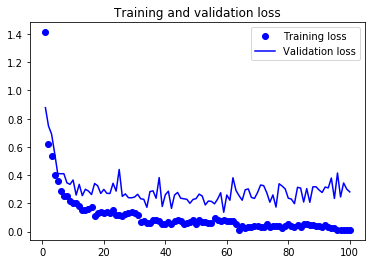

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

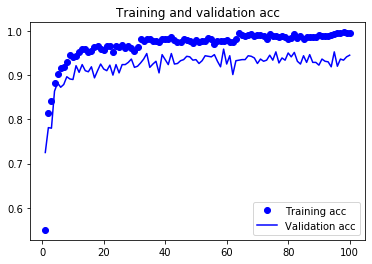

In [9]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'b',label='Validation acc')
plt.title('Training and validation acc')
plt.legend()

plt.show()

In [11]:
import glob
from PIL import Image
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from keras import backend as K
from keras.models import load_model
model = load_model('number_painting.h5')

test_generator = test_datagen.flow_from_directory(test_dir, #타깃 디렉터리
                                                    target_size=(50,50), #모든 이미지 150X150으로 변경
                                                    batch_size=32, #
                                                    class_mode='categorical')
filenames = test_generator.filenames
nb_samples = len(filenames)

predict = model.predict_generator(test_generator,steps = nb_samples)


# img_path='정규화원본/test/0/normalizationSF61527.bmp'
# img = image.load_img(img_path,target_size=(50,50))
# plt.imshow(img)

# x=image.img_to_array(img)
# x=np.expand_dims(x,axis=0)
# x=x/255.



    
# prediction =model.predict_classes(x)
# #prediction =model.predict(x)
# print(prediction)
#np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})

Found 16000 images belonging to 10 classes.


In [12]:
print(predict)

[[1.4805024e-12 1.1785224e-07 6.3136611e-09 ... 2.8993970e-08
  9.0014958e-04 9.9857461e-01]
 [1.9701421e-20 1.5478572e-13 1.1277125e-08 ... 7.4333890e-14
  2.8034918e-13 2.0277668e-09]
 [2.1695259e-08 1.2088515e-10 9.9999952e-01 ... 3.1641762e-12
  8.7501579e-09 9.3021780e-12]
 ...
 [1.1762357e-08 6.4647296e-09 9.8120683e-01 ... 5.0785470e-15
  1.4821206e-02 1.2623608e-10]
 [1.9819144e-12 4.4178825e-09 8.0529509e-07 ... 2.5734730e-18
  3.7482283e-07 1.5394195e-14]
 [9.9963963e-01 2.8910181e-05 3.3125063e-04 ... 1.5962215e-07
  1.7784911e-08 6.5505856e-12]]


In [11]:
test_generator = test_datagen.flow_from_directory(test_dir, #타깃 디렉터리
                                                    target_size=(50,50), #모든 이미지 150X150으로 변경
                                                    batch_size=32, #
                                                    class_mode='categorical')
score=model.evaluate(test_generator)

Found 16000 images belonging to 10 classes.
500/500 [==============================] - 20s 41ms/step


In [12]:
print(score)

[0.3336101735238917, 0.9294375]
